In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales/index_2.csv
/kaggle/input/coffee-sales/index_1.csv


In [2]:
df1=pd.read_csv('/kaggle/input/coffee-sales/index_1.csv')
df2=pd.read_csv('/kaggle/input/coffee-sales/index_2.csv')
print(f'df1 shape:',df1.shape)
print(f'df2 shape:',df2.shape)


df1 shape: (3636, 6)
df2 shape: (262, 5)


In [3]:
df1=df1.drop(['card'],axis=1)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   money        3636 non-null   float64
 4   coffee_name  3636 non-null   object 
dtypes: float64(1), object(4)
memory usage: 142.2+ KB


In [5]:
df1.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [6]:
df1.head()

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte


In [7]:
df2.head()

,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk


In [8]:
df_all = pd.concat([df1, df2], ignore_index=True)

df_all.head()

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte


In [9]:
df_all.isnull().sum()

date           0
datetime       0
cash_type      0
money          0
coffee_name    0
dtype: int64

In [10]:
#feature eng
df_all['date']=pd.to_datetime(df_all['date'])
df_all['sale_year']=df_all['date'].dt.year
df_all['sale_month']=df_all['date'].dt.month
df_all['sale_day']=df_all['date'].dt.day
df_all['dayofweek'] = df_all['date'].dt.dayofweek  
df_all['is_weekend'] = df_all['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
df_all['week_of_month'] = df_all['sale_day'].apply(lambda x: (x - 1) // 7 + 1)
df_all['has_milk'] = df_all['coffee_name'].str.contains('milk', case=False).astype(int)
df_all['coffee_length'] = df_all['coffee_name'].str.len()
df_all['money_range'] = pd.qcut(df_all['money'], q=3, labels=['Low', 'Medium', 'High'])
df_all=df_all.drop(['date','datetime'],axis=1)
df_all.head()

,cash_type,money,coffee_name,sale_year,sale_month,sale_day,dayofweek,is_weekend,week_of_month,has_milk,coffee_length,money_range
0,card,38.7,Latte,2024,3,1,4,0,1,0,5,High
1,card,38.7,Hot Chocolate,2024,3,1,4,0,1,0,13,High
2,card,38.7,Hot Chocolate,2024,3,1,4,0,1,0,13,High
3,card,28.9,Americano,2024,3,1,4,0,1,0,9,Medium
4,card,38.7,Latte,2024,3,1,4,0,1,0,5,High


In [11]:
#check skewness
from scipy.stats import skew
numeric_cols = df_all.select_dtypes(include='number').columns
skew_vals = df_all[numeric_cols].apply(skew).sort_values(ascending=False)
##all moderted skewness 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


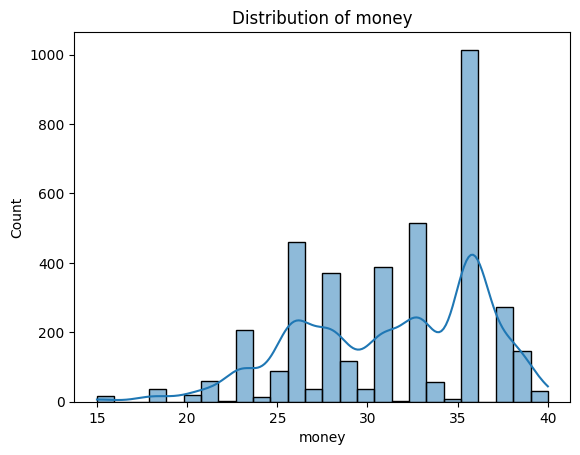

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


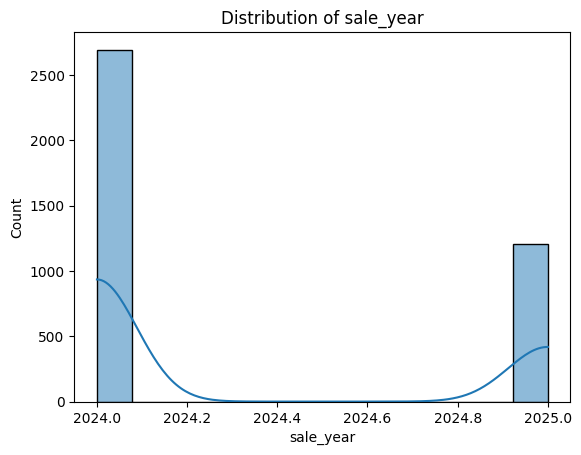

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


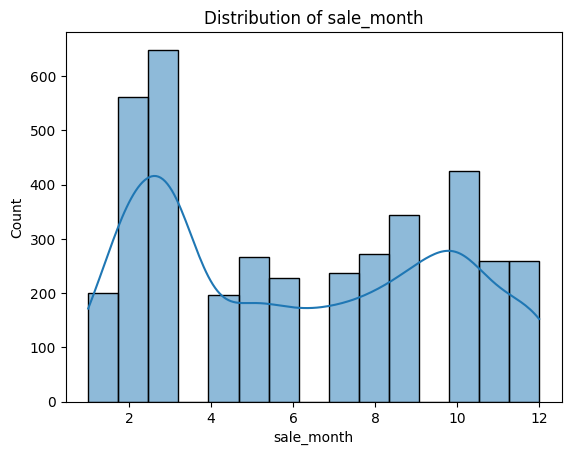

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


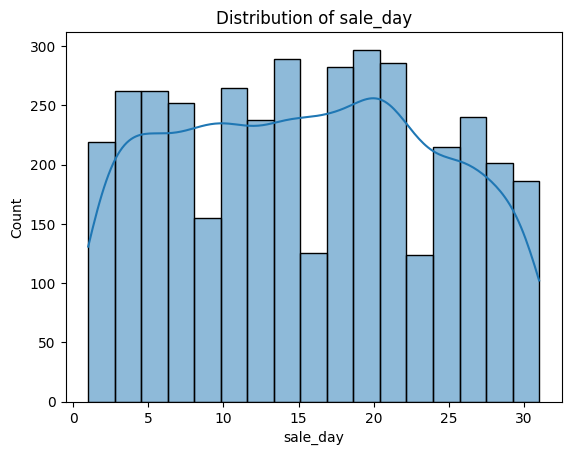

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


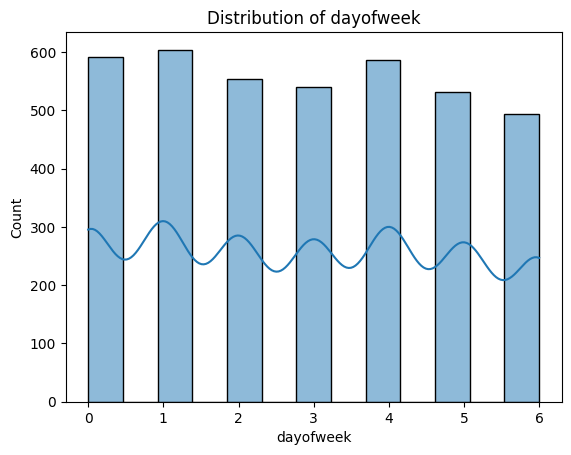

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


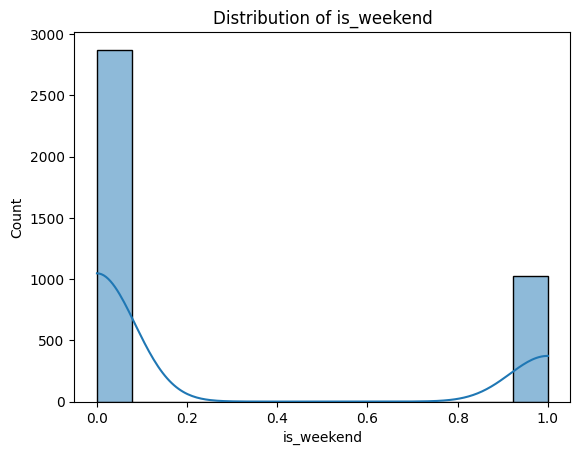

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


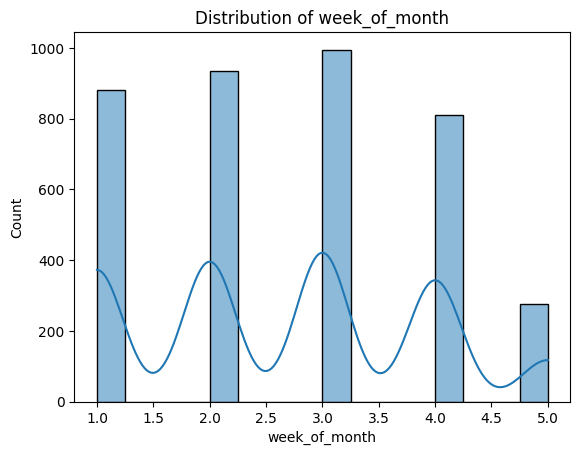

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


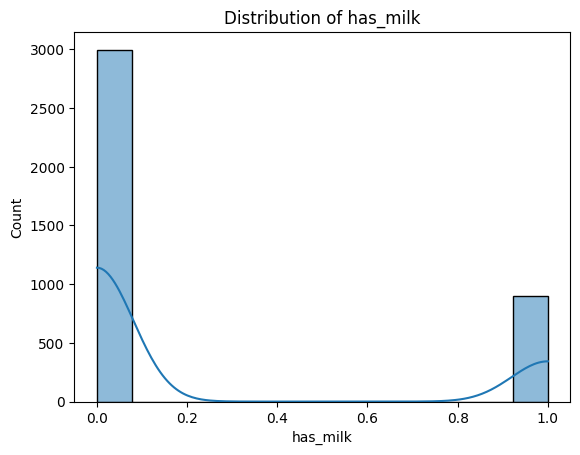

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


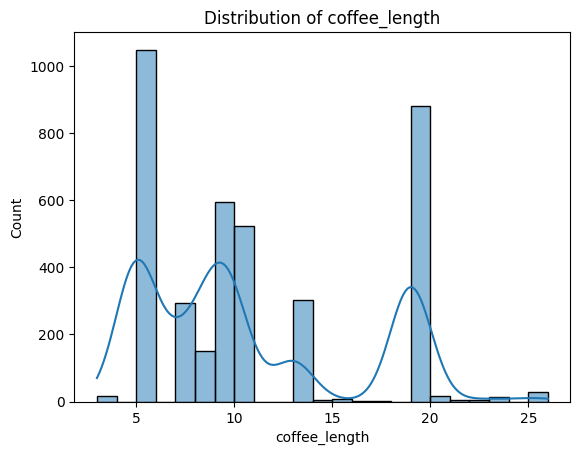

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    sns.histplot(df_all[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


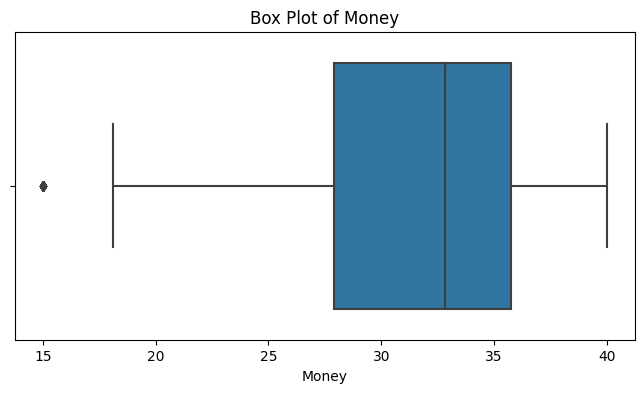

In [13]:

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_all['money'])
plt.title('Box Plot of Money')
plt.xlabel('Money')
plt.show()


In [14]:
df_all.head()

,cash_type,money,coffee_name,sale_year,sale_month,sale_day,dayofweek,is_weekend,week_of_month,has_milk,coffee_length,money_range
0,card,38.7,Latte,2024,3,1,4,0,1,0,5,High
1,card,38.7,Hot Chocolate,2024,3,1,4,0,1,0,13,High
2,card,38.7,Hot Chocolate,2024,3,1,4,0,1,0,13,High
3,card,28.9,Americano,2024,3,1,4,0,1,0,9,Medium
4,card,38.7,Latte,2024,3,1,4,0,1,0,5,High


In [15]:
df_all['cash_type']=df_all['cash_type'].map({'card':0,'cash':1})
df_all['money_range']=df_all['money_range'].map({'Medium':0,'Low':1,'High':2})

In [16]:
freq_encoding = df_all['coffee_name'].value_counts(normalize=True)
df_all['coffee_name'] = df_all['coffee_name'].map(freq_encoding)
df_all.head()

,cash_type,money,coffee_name,sale_year,sale_month,sale_day,dayofweek,is_weekend,week_of_month,has_milk,coffee_length,money_range
0,0,38.7,0.206773,2024,3,1,4,0,1,0,5,2
1,0,38.7,0.072345,2024,3,1,4,0,1,0,13,2
2,0,38.7,0.072345,2024,3,1,4,0,1,0,13,2
3,0,28.9,0.152129,2024,3,1,4,0,1,0,9,0
4,0,38.7,0.206773,2024,3,1,4,0,1,0,5,2


In [17]:
pivot_mean = df_all.pivot_table(
    values='money',
    index='cash_type',
    columns='coffee_name',
    aggfunc='mean',
    fill_value=0
)

print("Pivot Table (Mean of money):")
print(pivot_mean)

pivot_count = df_all.pivot_table(
    values='money',       
    index='cash_type',
    columns='coffee_name',
    aggfunc='count',
    fill_value=0
)

print("\nPivot Table (Count of records):")
print(pivot_count)


Pivot Table (Mean of money):
coffee_name  0.000257  0.000513  0.000770  0.001026  0.001283  0.001539  \
cash_type                                                                 
0               27.25      29.4      26.5      28.0      28.5      28.0   
1               25.50      20.0      26.5       0.0      30.0      28.0   

coffee_name  0.002052   0.003079  0.003848   0.004105  0.005387  0.011288  \
cash_type                                                                   
0                28.0  27.666667      27.0  22.913043      25.0      25.0   
1                 0.0  27.222222      27.0  19.666667      25.0      25.0   

coffee_name   0.038994   0.062340   0.072345  0.074910   0.132632   0.152129  \
cash_type                                                                      
0            20.893333  35.653389  35.990797  25.73122  35.752797  25.960314   
1            21.714286  39.250000  39.833333  30.00000  37.250000  28.100000   

coffee_name   0.206773   0.211390  
cash

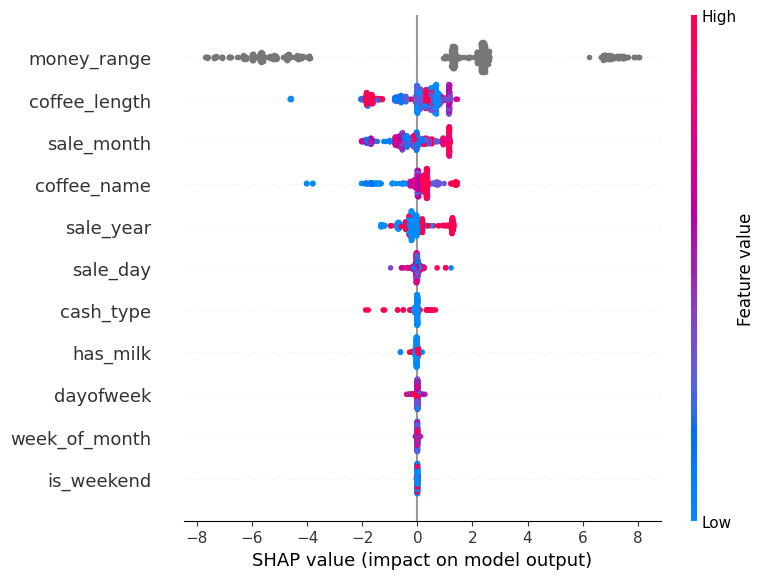

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

X = df_all.drop(columns=['money'])  
y = df_all['money']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [19]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# -----------------------------
# 1. Select features and target
# -----------------------------
feature_cols = ['cash_type', 'coffee_name', 'sale_year', 'sale_month', 'sale_day',
                'dayofweek', 'is_weekend', 'week_of_month', 'has_milk', 'coffee_length']
target_col = 'money'

X = df_all[feature_cols]
y = df_all[target_col]

# ------------------------
# 2. Train-Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------
# 3. Preprocessing
# ------------------------
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')  # Keep any other columns as-is (already encoded)

# ------------------------
# 4. Full Pipeline
# ------------------------
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# ------------------------
# 5. Cross-Validation
# ------------------------
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

print("Gradient Boosting - Cross-Validation R2 Scores:", np.round(cv_scores, 4))
print("Mean R2 Score:", round(cv_scores.mean(), 4))
print("Std Dev of R2:", round(cv_scores.std(), 4))

# ------------------------
# 6. Final Fit and Evaluate on Test Set
# ------------------------
pipeline.fit(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print("Test Set R² Score:", round(test_score, 4))


Gradient Boosting - Cross-Validation R2 Scores: [0.9716 0.9867 0.9893 0.9891 0.9914]
Mean R2 Score: 0.9856
Std Dev of R2: 0.0072
Test Set R² Score: 0.9827


In [21]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

results_df.to_csv("/kaggle/working/prediction_results.csv", index=False)
print("✅ Saved prediction_results.csv to Kaggle working directory.")

✅ Saved prediction_results.csv to Kaggle working directory.


In [22]:
readme_text = """
Coffee Sales Prediction with Gradient Boosting
=============================================

Project Overview:
-----------------
This project predicts the amount of money spent per coffee order using various features such as coffee type, date, and order characteristics.
A Gradient Boosting Regressor was used, along with a pipeline and cross-validation for model evaluation.

Steps Performed:
----------------
1. Data loading and cleaning
2. Feature engineering and encoding
3. Correlation and SHAP analysis
4. Cross-validation using Gradient Boosting
5. Final evaluation on test set
6. Saving results as CSV

Results:
--------
- Cross-validation Mean R² Score: ~0.98
- Test Set R² Score: ~0.98

Files:
------
- prediction_results.csv : predictions with actual values
- README.txt : this file

Usage:
------
Run the script in a Jupyter environment or use it in a Kaggle notebook.
Ensure the dataset is in the correct path.

Author:
-------
Zahraa Alrubaue
"""


with open("README.txt", "w") as f:
    f.write(readme_text)

print("✅ README.txt created and saved.")

✅ README.txt created and saved.
